In [1]:
from sklearn.compose import ColumnTransformer
from global_variables import *
import sklearn, os

import pandas as pd
import numpy as np

In [2]:
_df_raw = pd.read_csv(os.path.join(data_path,'aggregated_raw_data.txt'), encoding = 'utf-8', index_col = 'customer_id')
_df_raw.head()

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_gender,customer_education_level,customer_job_status,customer_income_level,customer_age,akbank_banking_age,...,trans_average_amount_OTHER,trans_average_amount_RESTORAN,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std
customer_id,,,,,,,,,,,,,,,,,,,,,
25139695,36.991388,35.325423,36.971366,35.362328,E,LÝSE,ÜCRETLÝ (ÖZEL),2500.0,55,2.0,...,260.160000,0.000000,0.000000,0.5,0.166667,0.416667,0.00,0.000000,536.446923,483.135578
23187800,36.991388,35.325423,41.100502,28.892116,E,LÝSE,ÜCRETLÝ (ÖZEL),850.0,39,3.0,...,233.650000,0.000000,0.000000,0.0,2.333333,0.833333,0.00,0.000000,940.334167,389.759400
16400475,36.991388,35.325423,41.008290,29.083431,E,ÜNÝVERSÝTE,SERBEST MESLEK,2000.0,45,8.0,...,5344.329000,0.000000,0.000000,0.0,0.166667,0.833333,0.00,0.000000,39089.802727,23847.265741
17303354,36.991388,35.325423,37.017533,35.337688,E,LÝSE,ÜCRETLÝ (ÖZEL),3500.0,35,7.0,...,248.151000,35.166667,27.500000,1.5,2.583333,4.166667,0.25,0.166667,755.028333,1271.491472
15522570,36.991388,35.325423,41.080110,28.989460,E,LÝSE,ÜCRETLÝ (ÖZEL),2000.0,48,8.0,...,138.499167,0.000000,47.532667,0.0,5.416667,2.000000,0.00,1.250000,680.262500,521.931112


In [10]:
_corr_matrix = _df_raw.corr()
np.fill_diagonal(_corr_matrix.to_numpy(), np.nan)
pd.concat([_corr_matrix.idxmin(), _corr_matrix.min(), _corr_matrix.idxmax(), _corr_matrix.max()], axis=1)

,0,1,2,3
customer_main_branch_x_coord,customer_main_branch_y_coord,-0.454950,customer_home_x_coord,0.286270
customer_main_branch_y_coord,customer_main_branch_x_coord,-0.454950,customer_home_y_coord,0.243708
customer_home_x_coord,customer_home_y_coord,-0.523859,customer_main_branch_x_coord,0.286270
customer_home_y_coord,customer_home_x_coord,-0.523859,customer_main_branch_y_coord,0.243708
customer_income_level,customer_home_y_coord,-0.003121,payment_mean,0.073209
customer_age,customer_home_y_coord,-0.026858,akbank_banking_age,0.323832
akbank_banking_age,customer_home_y_coord,-0.039272,customer_age,0.323832
1)RISKSIZ,NaN,NaN,NaN,NaN
2)GECIKME 1-15 GUN,NaN,NaN,NaN,NaN
3)GECIKME 16-29 GUN,NaN,NaN,NaN,NaN


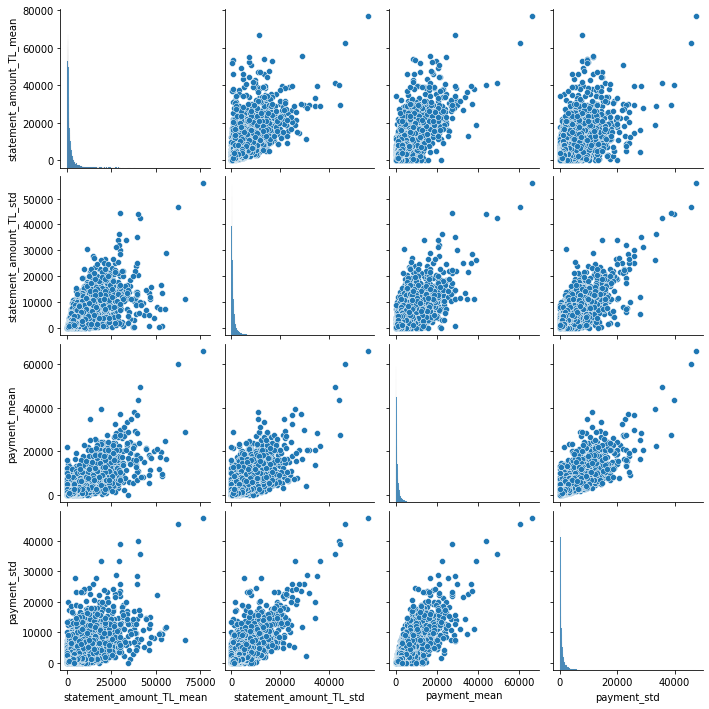

In [13]:
from seaborn import pairplot
pairplot(_df_raw.get(['statement_amount_TL_mean', 'statement_amount_TL_std', 'payment_mean', 'payment_std']))

In [3]:
print( _df_raw.customer_gender.value_counts() )

_df_male = _df_raw[_df_raw['customer_gender'] == 'E'].drop('customer_gender', axis = 1)
_df_female = _df_raw[_df_raw['customer_gender'] == 'K'].drop('customer_gender', axis = 1)

_df_male.shape, _df_female.shape

E    52268
K    13372
Name: customer_gender, dtype: int64


((52268, 42), (13372, 42))

In [4]:
_df_raw.drop('customer_gender', axis = 1, inplace = True)
_scale_columns = _df_raw.select_dtypes(exclude = 'object').columns
_encode_columns = _df_raw.select_dtypes(include = 'object').columns

_pipe = ColumnTransformer([
        ("standard scale", sklearn.preprocessing.StandardScaler(), _scale_columns),
        ("encode", sklearn.preprocessing.OrdinalEncoder(), _encode_columns)
    ], remainder='passthrough')

In [5]:
df_male = pd.DataFrame(_pipe.fit_transform(_df_male), 
                       index = _df_male.index,
                       columns = np.concatenate([_scale_columns, _encode_columns])) 
df_female = pd.DataFrame(_pipe.fit_transform(_df_female), 
                         index = _df_female.index,
                         columns = np.concatenate([_scale_columns, _encode_columns]))

In [7]:
df_male.to_csv(os.path.join(data_path,'males.csv'))
df_female.to_csv(os.path.join(data_path,'females.csv'))

In [83]:
def dataset_splits(df, splits = (.7, .1, .2), seed = None):
    total_size = len(df)
    np.random.seed(seed)
    rnd_indices = np.random.permutation(total_size)
    indices_or_sections = [int(splits[0] * total_size), int((1 - splits[-1]) * total_size)]
    return np.split(df.iloc[rnd_indices,:], indices_or_sections)